<a href="https://colab.research.google.com/github/younus1082/Simulation-Modeling/blob/main/Assignment6/SIM_Lab6_Younus_1082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis testing concepts: Two-Sample t-Test

We want to determine whether there is a significant difference between the means of two independent datasets (Sample 1 and Sample 2) using a two-sample t-test. We assume equal variances.

## Import Necessary Libraries

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Step 1: Define the two independent datasets

In [10]:
data1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])  # Sample 1
data2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])  # Sample 2

## Step 2: Perform the two-sample t-test (pool t-test assumes equal variances)

In [11]:
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=True)

## Calculate confidence interval for the difference of means

In [12]:


# mean difference
mean_diff = np.mean(data1) - np.mean(data2)

# sample sizes
n1, n2 = len(data1), len(data2)

# sample variances
s1_sq, s2_sq = np.var(data1, ddof=1), np.var(data2, ddof=1)

# pooled variance
sp_sq = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)

# standard error using pooled variance
std_err = np.sqrt(sp_sq * (1/n1 + 1/n2))

# degrees of freedom
df = n1 + n2 - 2

# 95% confidence interval
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

## Step 3: Display results

In [13]:
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")


Sample 1 Mean: 18.48
Sample 2 Mean: 20.30
t-Statistic: -8.54
Degrees of Freedom: 8.00
p-Value: 0.0000
Confidence Interval of Mean Difference: [-2.31, -1.33]


## Step 4: Conclusion

In [14]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

Reject the null hypothesis. The means of the two samples are significantly different.


## Step 5: Visualize the data

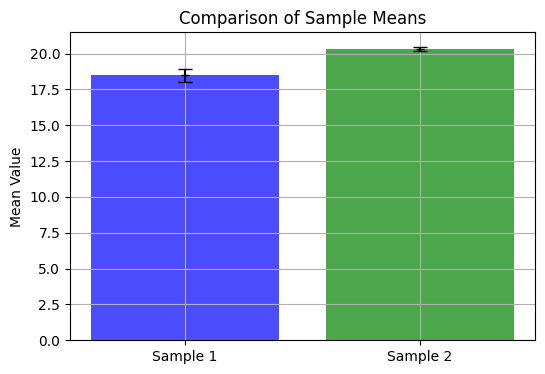

In [15]:
plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], color=['blue', 'green'], alpha=0.7)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1, ddof=1), np.std(data2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()

**Decision & Interpretation:**

Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis. This means there is a statistically significant difference between the means of the two samples.

----------------------


### **Explanation of the Python Code (Line by Line)**  

This script performs a **two-sample t-test** using Python’s `scipy.stats` and visualizes the results using `matplotlib`.  

---

### **1. Importing Required Libraries**
```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
```
- `import numpy as np` → Imports **NumPy**, a library for numerical computations and array operations.  
- `from scipy import stats` → Imports the `stats` module from **SciPy**, which provides statistical functions.  
- `import matplotlib.pyplot as plt` → Imports **Matplotlib**, a library for creating plots and graphs.

---

### **2. Defining Two Independent Datasets**
```python
data1 = np.array([18.4, 19.1, 17.9, 18.7, 18.3])  # Sample 1
data2 = np.array([20.2, 20.5, 20.1, 20.3, 20.4])  # Sample 2
```
- `np.array([...])` → Creates NumPy arrays to store the numerical data.  
- These arrays represent two **independent samples** (e.g., test scores from two different groups).

---

### **3. Performing the Two-Sample t-Test**
```python
# Use equal_var=False for Welch's t-test (unequal variances assumption)
t_stat, p_value = stats.ttest_ind(data1, data2, equal_var=False)
```
- `stats.ttest_ind()` → Performs a **two-sample t-test** to compare the means of `data1` and `data2`.  
- `equal_var=False` → Specifies **Welch’s t-test**, which does **not assume equal variances**.  
- **Outputs:**
  - `t_stat` → **t-statistic**, which measures the difference between means in standard error units.
  - `p_value` → **p-value**, which indicates the probability of observing the data under the null hypothesis.

---

### **4. Displaying the Results**
```python
print(f'Sample 1 Mean: {np.mean(data1):.2f}')
print(f'Sample 2 Mean: {np.mean(data2):.2f}')
print(f't-Statistic: {t_stat:.2f}')
print(f'p-Value: {p_value:.4f}')
```
- `np.mean(data1)` → Computes the **mean** of `data1`.  
- `np.mean(data2)` → Computes the **mean** of `data2`.  
- `t_stat:.2f` → Prints the **t-statistic**, rounded to **two decimal places**.  
- `p_value:.4f` → Prints the **p-value**, rounded to **four decimal places**.  
- **Formatted string literals (f-strings)** are used to format and display the results.

---

### **5. Making a Decision Based on p-Value**
```python
alpha = 0.05  # Significance level
if p_value < alpha:
    print('Reject the null hypothesis. The means of the two samples are significantly different.')
else:
    print('Fail to reject the null hypothesis. The means of the two samples are not significantly different.')
```
- **Significance level (α)** is set to **0.05** (5%).  
- If `p_value < 0.05`, the script **rejects the null hypothesis**, meaning there is a **significant difference** between the two sample means.  
- Otherwise, it **fails to reject** the null hypothesis, indicating that the means **are not significantly different**.

---

### **6. Visualizing the Data**
```python
plt.figure(figsize=(6, 4))  # Set the figure size
plt.bar(["Sample 1", "Sample 2"], [np.mean(data1), np.mean(data2)], color=['blue', 'orange'], alpha=0.7)
plt.errorbar([0, 1], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1), np.std(data2)], fmt='k_', capsize=10)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()
```
- `plt.figure(figsize=(6, 4))` → Creates a **figure** with dimensions **6x4 inches**.  
- `plt.bar([...], [...])` → **Creates a bar chart** to visualize the mean values.  
  - The first list `["Sample 1", "Sample 2"]` defines the **x-axis labels**.  
  - The second list `[np.mean(data1), np.mean(data2)]` represents the **heights** of the bars.  
  - `color=['blue', 'orange']` assigns **colors** to the bars.  
  - `alpha=0.7` makes the bars slightly transparent.  
- `plt.errorbar([...], [...], yerr=[...])` → **Adds error bars** to show variability.  
  - `[0, 1]` are the **x-axis positions** of the bars.  
  - `[np.mean(data1), np.mean(data2)]` are the **y-values** (means).  
  - `yerr=[np.std(data1), np.std(data2)]` sets **error bars** as standard deviations.  
  - `fmt='k_'` specifies the error bars in **black** (`'k'`).  
  - `capsize=10` adds small horizontal **caps** on top of the error bars.  
- `plt.title('Comparison of Sample Means')` → Adds a **title**.  
- `plt.ylabel('Mean Value')` → Labels the **y-axis**.  
- `plt.grid(True)` → Adds a **grid** to the background.  
- `plt.show()` → Displays the **plot**.

---

### **Final Summary**
- This script compares two independent datasets using a **two-sample t-test**.  
- It calculates:
  - **Mean values** of both datasets.  
  - **t-statistic** and **p-value**.  
  - **Decision on hypothesis testing** (reject or fail to reject).  
- Finally, it **visualizes the results** using a bar chart with **error bars**.




---

## Problem Statement

**Perform a two-sample t-test on the following data:**

* **Data 1:** \[18.4, 19.1, 17.9, 18.7, 18.3]
* **Data 2:** \[20.2, 20.5, 20.1, 20.3, 20.4]

Use significance level **α = 0.05** to determine whether the population means differ.

### Tasks

1. State $H_0$ and $H_1$. Specify whether you will assume **equal variances** (pooled) or **unequal variances** (Welch), and **justify your choice in one sentence**.
2. Compute the **sample means**, **sample variances (ddof = 1)**, and the **mean difference**.
3. Calculate the **t-statistic**, **degrees of freedom**, and the **two-tailed p-value**.
4. Construct the **95% confidence interval** for the mean difference.
5. **Decision & Interpretation:** Conclude (reject / fail to reject $H_0$) and explain the result **in one or two plain-English sentences**.

> **Hint:** If you assume equal variances, use the pooled standard error. If you assume unequal variances, use Welch’s standard error and df.

---




In [16]:
#Homework: Welch t test